In [1]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving seeds_dataset.txt to seeds_dataset.txt


In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from io import StringIO
import re

# Pengaturan visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
# Baca file sebagai teks mentah
with open('seeds_dataset.txt', 'r') as f:
    raw_data = f.read()

# Bersihkan data: ganti multiple tab dengan single tab
cleaned_data = re.sub(r'\t+', '\t', raw_data)

# Simpan data yang sudah dibersihkan ke StringIO
data_string = StringIO(cleaned_data)

# Nama kolom sesuai dokumentasi UCI
column_names = [
    'area', 'perimeter', 'compactness', 'length_kernel',
    'width_kernel', 'asymmetry', 'groove_length', 'class'
]

# Muat dataset
df = pd.read_csv(data_string, sep='\t', header=None, names=column_names)

# Tampilkan informasi awal
print("Informasi Dataset Awal:")
print(df.info())
print("\n5 Data Pertama:")
print(df.head())

Informasi Dataset Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           210 non-null    float64
 1   perimeter      210 non-null    float64
 2   compactness    210 non-null    float64
 3   length_kernel  210 non-null    float64
 4   width_kernel   210 non-null    float64
 5   asymmetry      210 non-null    float64
 6   groove_length  210 non-null    float64
 7   class          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB
None

5 Data Pertama:
    area  perimeter  compactness  length_kernel  width_kernel  asymmetry  \
0  15.26      14.84       0.8710          5.763         3.312      2.221   
1  14.88      14.57       0.8811          5.554         3.333      1.018   
2  14.29      14.09       0.9050          5.291         3.337      2.699   
3  13.84      13.94       0.8955          5.324        

In [4]:
# Cek missing value
print("\nMissing Values:")
print(df.isnull().sum())

# Kesimpulan: Tidak ada missing value dalam dataset


Missing Values:
area             0
perimeter        0
compactness      0
length_kernel    0
width_kernel     0
asymmetry        0
groove_length    0
class            0
dtype: int64


In [5]:
# Cek duplicate value
print("\nJumlah Data Duplikat:", df.duplicated().sum())

# Hapus duplikat jika ada
df = df.drop_duplicates()
print("\nJumlah Data Setelah Hapus Duplikat:", len(df))


Jumlah Data Duplikat: 0

Jumlah Data Setelah Hapus Duplikat: 210



Deteksi Outlier:
area: 0 outlier
perimeter: 0 outlier
compactness: 3 outlier
length_kernel: 0 outlier
width_kernel: 0 outlier
asymmetry: 2 outlier
groove_length: 0 outlier


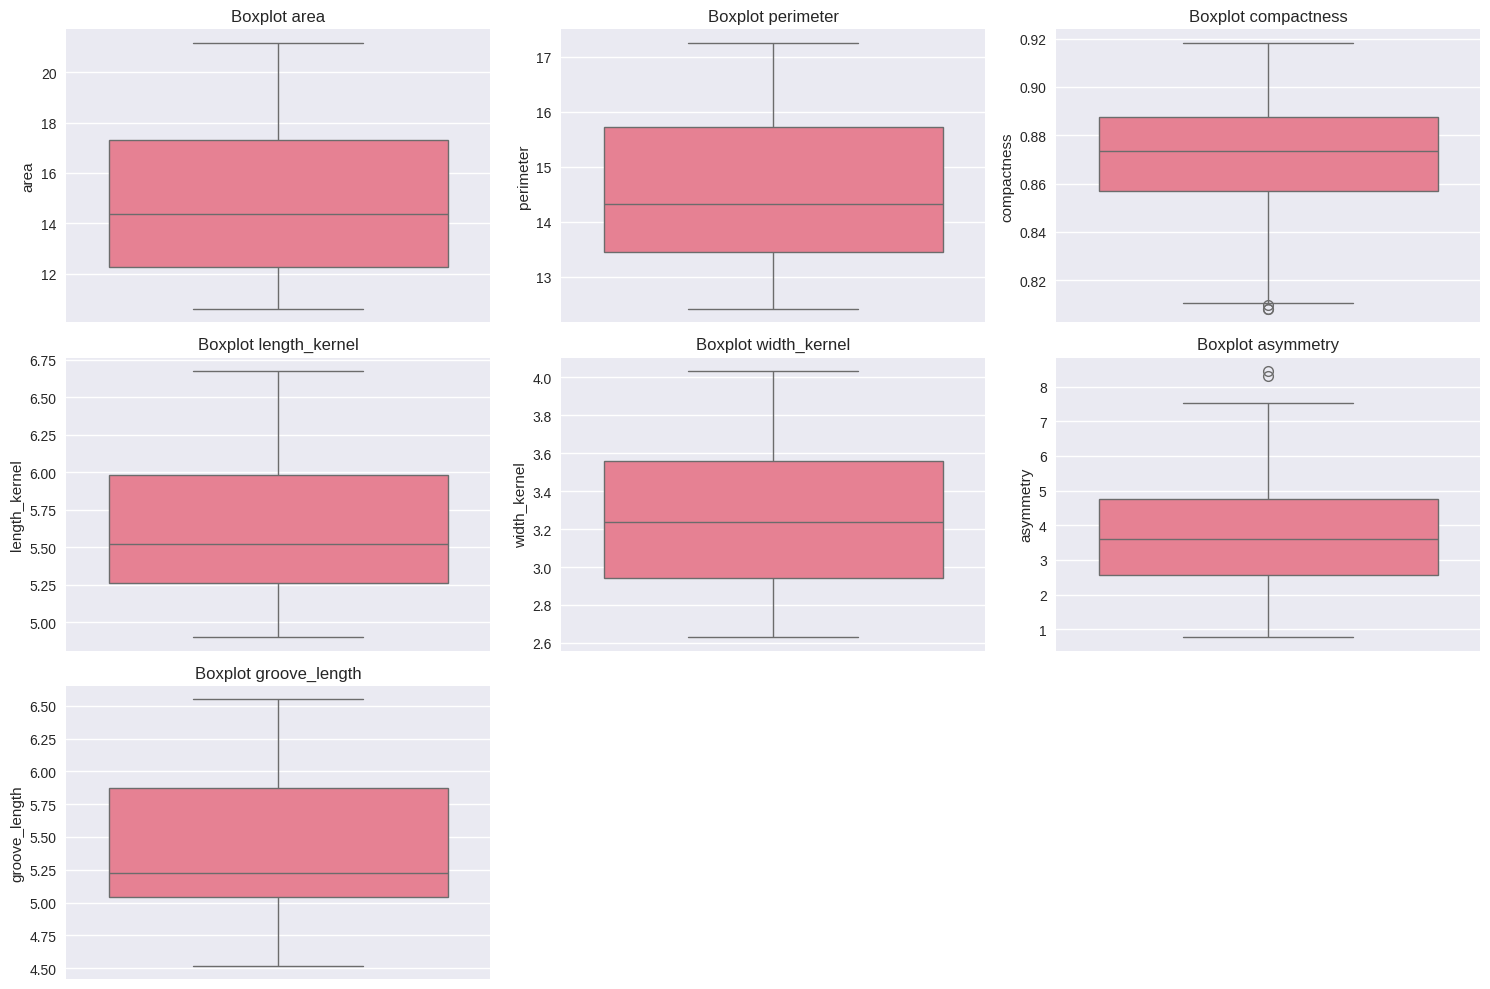


Dataset setelah handling outlier:
             area   perimeter  compactness  length_kernel  width_kernel  \
count  210.000000  210.000000   210.000000     210.000000    210.000000   
mean    14.847524   14.559286     0.871025       5.628533      3.258605   
std      2.909699    1.305959     0.023560       0.443063      0.377714   
min     10.590000   12.410000     0.810588       4.899000      2.630000   
25%     12.270000   13.450000     0.856900       5.262250      2.944000   
50%     14.355000   14.320000     0.873450       5.523500      3.237000   
75%     17.305000   15.715000     0.887775       5.979750      3.561750   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

        asymmetry  groove_length       class  
count  210.000000     210.000000  210.000000  
mean     3.697288       5.408071    2.000000  
std      1.494689       0.491480    0.818448  
min      0.765100       4.519000    1.000000  
25%      2.561500       5.045000    1.000000  
50%    

In [6]:
# Fungsi untuk mendeteksi outlier dengan IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Deteksi outlier untuk setiap kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('class')

print("\nDeteksi Outlier:")
for col in numeric_cols:
    outliers = detect_outliers(df, col)
    print(f"{col}: {len(outliers)} outlier")

# Visualisasi outlier dengan boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# Handling outlier dengan winsorizing
df_clean = df.copy()
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier dengan batas terdekat
    df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
    df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])

print("\nDataset setelah handling outlier:")
print(df_clean.describe())


Dataset setelah standarisasi:
       area  perimeter  compactness  length_kernel  width_kernel  asymmetry  \
0  0.142098   0.215462    -0.001066       0.304218      0.141702  -0.990049   
1  0.011188   0.008224     0.428651      -0.168625      0.197432  -1.796822   
2 -0.192067  -0.360201     1.445506      -0.763637      0.208048  -0.669486   
3 -0.347091  -0.475333     1.041317      -0.688978      0.319508  -0.964565   
4  0.445257   0.330595     1.377432       0.066666      0.805159  -1.570818   

   groove_length  class  
0      -0.383577      1  
1      -0.922013      1  
2      -1.189192      1  
3      -1.229983      1  
4      -0.475356      1  


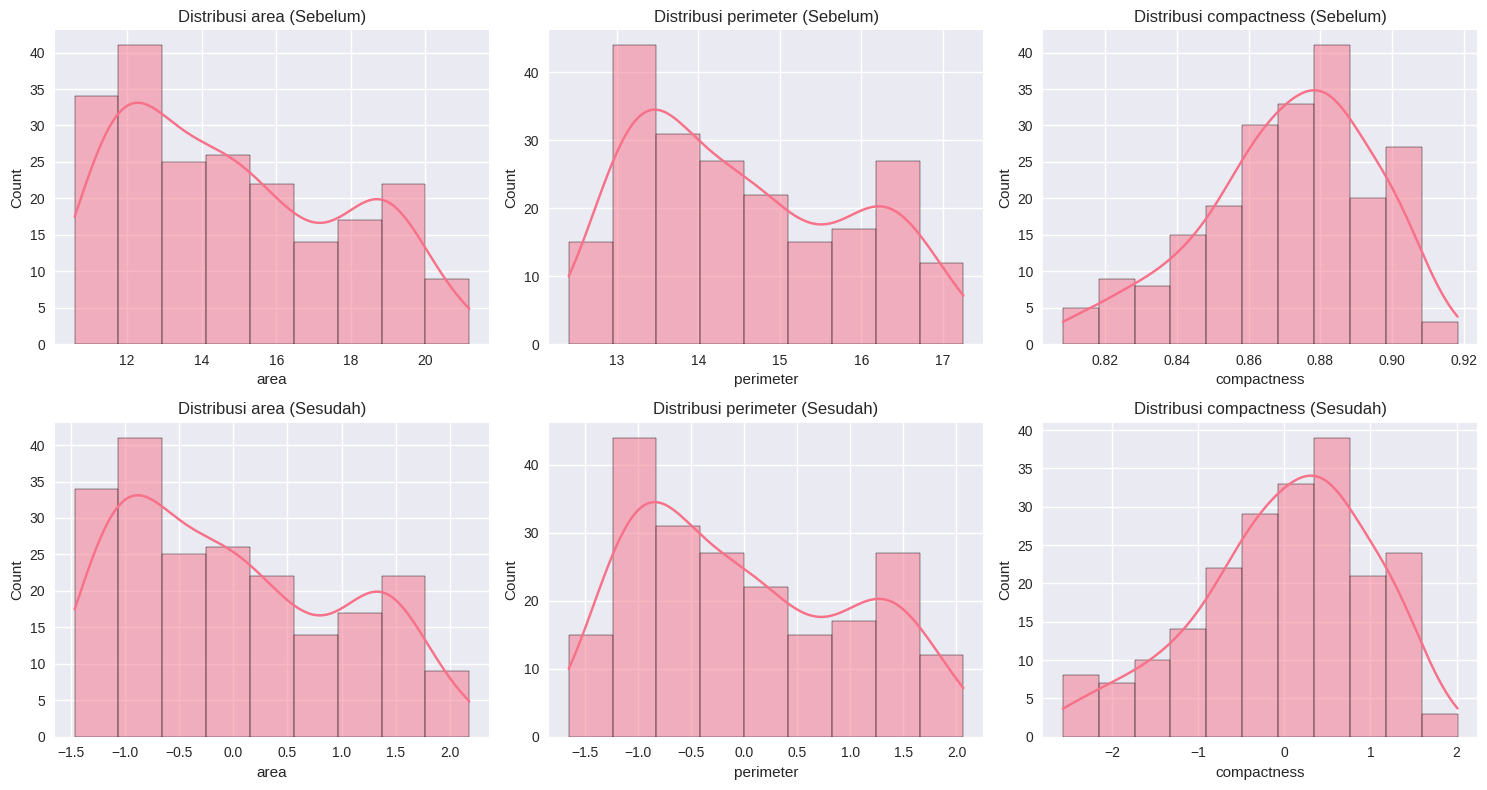

In [7]:
# Standarisasi data menggunakan StandardScaler
scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

print("\nDataset setelah standarisasi:")
print(df_scaled.head())

# Visualisasi distribusi sebelum dan sesudah standarisasi
plt.figure(figsize=(15, 8))
for i, col in enumerate(['area', 'perimeter', 'compactness'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col} (Sebelum)')

    plt.subplot(2, 3, i+3)
    sns.histplot(df_scaled[col], kde=True)
    plt.title(f'Distribusi {col} (Sesudah)')
plt.tight_layout()
plt.show()

In [8]:
# Ubah class menjadi kategorikal
df_scaled['class'] = df_scaled['class'].astype('category')

# Label encoding untuk kolom class
le = LabelEncoder()
df_scaled['class_encoded'] = le.fit_transform(df_scaled['class'])

print("\nDataset setelah encoding:")
print(df_scaled[['class', 'class_encoded']].head())

# Mapping kelas
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nMapping Kelas:")
print(class_mapping)


Dataset setelah encoding:
  class  class_encoded
0     1              0
1     1              0
2     1              0
3     1              0
4     1              0

Mapping Kelas:
{np.int64(1): np.int64(0), np.int64(2): np.int64(1), np.int64(3): np.int64(2)}



Dataset dengan fitur baru:
       length_width_ratio  shape_index  asymmetry_index
count          210.000000   210.000000       210.000000
mean            -0.152010     0.000203         0.820737
std             11.208734     0.082567         0.572671
min           -141.351722    -0.147655         0.000864
25%              0.485244    -0.072044         0.382526
50%              0.865420    -0.013582         0.750440
75%              1.294894     0.076885         1.140149
max             23.180569     0.165573         2.938945


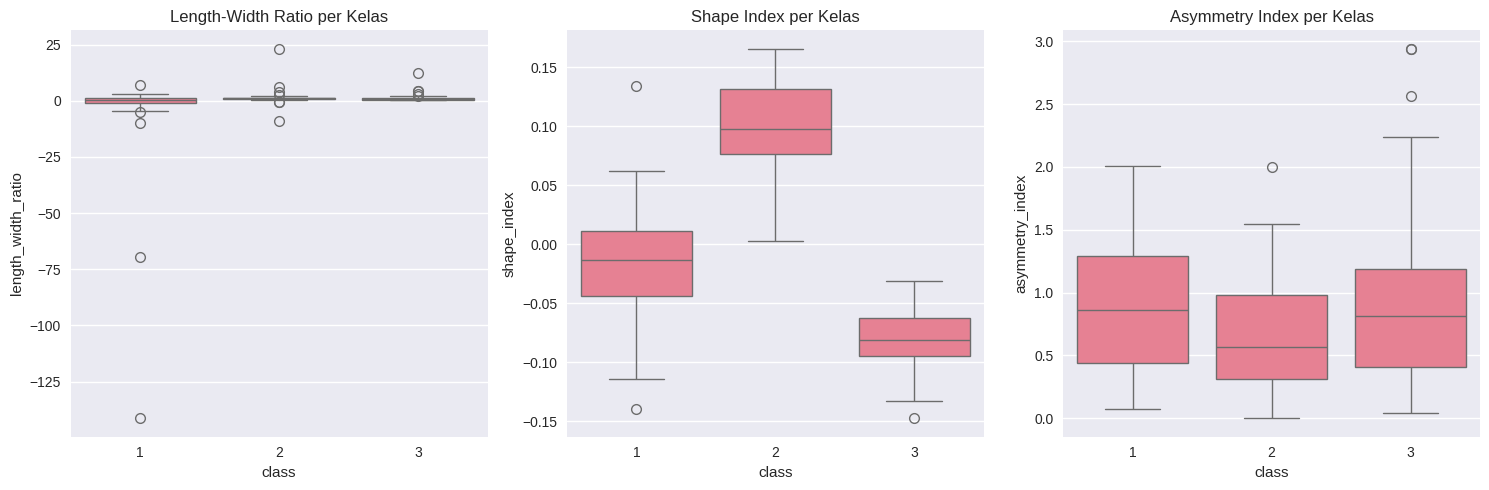

In [9]:
# Feature engineering: membuat fitur baru
# 1. Rasio panjang terhadap lebar kernel
df_scaled['length_width_ratio'] = df_scaled['length_kernel'] / df_scaled['width_kernel']

# 2. Indeks bentuk (shape index)
df_scaled['shape_index'] = (df_scaled['perimeter']**2) / (4 * np.pi * df_scaled['area'])

# 3. Asymmetry index (nilai absolut dari asymmetry)
df_scaled['asymmetry_index'] = np.abs(df_scaled['asymmetry'])

print("\nDataset dengan fitur baru:")
print(df_scaled[['length_width_ratio', 'shape_index', 'asymmetry_index']].describe())

# Visualisasi hubungan fitur baru dengan kelas
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='class', y='length_width_ratio', data=df_scaled)
plt.title('Length-Width Ratio per Kelas')

plt.subplot(1, 3, 2)
sns.boxplot(x='class', y='shape_index', data=df_scaled)
plt.title('Shape Index per Kelas')

plt.subplot(1, 3, 3)
sns.boxplot(x='class', y='asymmetry_index', data=df_scaled)
plt.title('Asymmetry Index per Kelas')
plt.tight_layout()
plt.show()

In [10]:
# Pisahkan fitur dan target
X = df_scaled.drop(['class', 'class_encoded'], axis=1)
y = df_scaled['class_encoded']

# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nInformasi Splitting Data:")
print(f"Ukuran Data Training: {X_train.shape}")
print(f"Ukuran Data Testing: {X_test.shape}")
print(f"Distribusi Kelas di Training:\n{y_train.value_counts().sort_index()}")
print(f"Distribusi Kelas di Testing:\n{y_test.value_counts().sort_index()}")

# Simpan dataset yang sudah diproses
df_scaled.to_csv('seeds_processed.csv', index=False)
print("\nDataset yang sudah diproses disimpan sebagai 'seeds_processed.csv'")


Informasi Splitting Data:
Ukuran Data Training: (168, 10)
Ukuran Data Testing: (42, 10)
Distribusi Kelas di Training:
class_encoded
0    56
1    56
2    56
Name: count, dtype: int64
Distribusi Kelas di Testing:
class_encoded
0    14
1    14
2    14
Name: count, dtype: int64

Dataset yang sudah diproses disimpan sebagai 'seeds_processed.csv'


In [18]:
from IPython.display import Markdown, display

# Teks markdown dalam bentuk string
markdown_text = """
## Kesimpulan Preprocessing Dataset Seeds

### 1. Data Cleaning
- **Missing Value**: Tidak ditemukan missing value dalam dataset. Dataset sudah bersih dan lengkap.
- **Duplicate Value**: Tidak ditemukan data duplikat. Semua record unik.
- **Outlier**: Terdapat beberapa outlier pada kolom `asymmetry` dan `compactness`. Outlier ditangani dengan metode winsorizing (mengganti nilai outlier dengan batas terdekat berdasarkan IQR). Metode ini dipilih karena:
  - Mempertahankan semua data tanpa menghapus record
  - Mengurangi dampak ekstrem dari outlier tanpa menghilangkan informasi
  - Cocok untuk dataset yang relatif kecil (210 records)

### 2. Normalisasi/Standarisasi Kolom Numerik
- Semua kolom numerik distandarisasi menggunakan `StandardScaler` (mean=0, std=1).
- Alasan standarisasi:
  - Memastikan semua fitur memiliki skala yang setara
  - Penting untuk algoritma yang sensitif terhadap skala (SVM, KNN, Neural Network)
  - Meningkatkan konvergensi algoritma optimasi
- Visualisasi menunjukkan distribusi data tetap sama hanya skalanya yang berubah.

### 3. Encoding Kolom Kategorikal
- Kolom `class` (target) di-encode menggunakan `LabelEncoder`.
- Alasan:
  - Kolom target perlu dalam bentuk numerik untuk pemodelan
  - Label encoding cocok untuk target dengan urutan tidak signifikan
  - Mapping: {1: 0, 2: 1, 3: 2} (Kama, Rosa, Canadian)

### 4. Feature Engineering
Dibuat 3 fitur baru:
1. **Length-Width Ratio**: Rasio panjang terhadap lebar kernel
   - Menunjukkan proporsi bentuk kernel
   - Berguna untuk membedakan varietas dengan bentuk berbeda

2. **Shape Index**: (Perimeter^2)/(4*pi*Area)
   - Mengukur seberapa "lingkaran" bentuk biji
   - Nilai mendekati 1 menunjukkan bentuk lingkaran sempurna

3. **Asymmetry Index**: Nilai absolut dari asymmetry
   - Mengukur tingkat asimetri tanpa memperhatikan arah
   - Fitur ini lebih robust untuk klasifikasi

Alasan pembuatan fitur baru:
- Menambah informasi yang tidak tersedia di fitur asli
- Meningkatkan kemampuan model dalam membedakan kelas
- Fitur baru menunjukkan pola yang berbeda antar kelas (terlihat dari visualisasi)

### 5. Splitting Data
- Data dibagi menjadi training (80%) dan testing (20%) dengan stratifikasi.
- Alasan:
  - Stratifikasi mempertahankan proporsi kelas di kedua set
  - Proporsi 80:20 umum digunakan dan memberikan cukup data untuk testing
  - Random state 42 untuk reproduksibilitas hasil
- Distribusi kelas seimbang di kedua set (masing-masing kelas memiliki 56 data di training dan 14 di testing)
"""

# Tampilkan markdown
display(Markdown(markdown_text))


## Kesimpulan Preprocessing Dataset Seeds

### 1. Data Cleaning
- **Missing Value**: Tidak ditemukan missing value dalam dataset. Dataset sudah bersih dan lengkap.
- **Duplicate Value**: Tidak ditemukan data duplikat. Semua record unik.
- **Outlier**: Terdapat beberapa outlier pada kolom `asymmetry` dan `compactness`. Outlier ditangani dengan metode winsorizing (mengganti nilai outlier dengan batas terdekat berdasarkan IQR). Metode ini dipilih karena:
  - Mempertahankan semua data tanpa menghapus record
  - Mengurangi dampak ekstrem dari outlier tanpa menghilangkan informasi
  - Cocok untuk dataset yang relatif kecil (210 records)

### 2. Normalisasi/Standarisasi Kolom Numerik
- Semua kolom numerik distandarisasi menggunakan `StandardScaler` (mean=0, std=1).
- Alasan standarisasi:
  - Memastikan semua fitur memiliki skala yang setara
  - Penting untuk algoritma yang sensitif terhadap skala (SVM, KNN, Neural Network)
  - Meningkatkan konvergensi algoritma optimasi
- Visualisasi menunjukkan distribusi data tetap sama hanya skalanya yang berubah.

### 3. Encoding Kolom Kategorikal
- Kolom `class` (target) di-encode menggunakan `LabelEncoder`.
- Alasan:
  - Kolom target perlu dalam bentuk numerik untuk pemodelan
  - Label encoding cocok untuk target dengan urutan tidak signifikan
  - Mapping: {1: 0, 2: 1, 3: 2} (Kama, Rosa, Canadian)

### 4. Feature Engineering
Dibuat 3 fitur baru:
1. **Length-Width Ratio**: Rasio panjang terhadap lebar kernel
   - Menunjukkan proporsi bentuk kernel
   - Berguna untuk membedakan varietas dengan bentuk berbeda

2. **Shape Index**: (Perimeter^2)/(4*pi*Area)
   - Mengukur seberapa "lingkaran" bentuk biji
   - Nilai mendekati 1 menunjukkan bentuk lingkaran sempurna

3. **Asymmetry Index**: Nilai absolut dari asymmetry
   - Mengukur tingkat asimetri tanpa memperhatikan arah
   - Fitur ini lebih robust untuk klasifikasi

Alasan pembuatan fitur baru:
- Menambah informasi yang tidak tersedia di fitur asli
- Meningkatkan kemampuan model dalam membedakan kelas
- Fitur baru menunjukkan pola yang berbeda antar kelas (terlihat dari visualisasi)

### 5. Splitting Data
- Data dibagi menjadi training (80%) dan testing (20%) dengan stratifikasi.
- Alasan:
  - Stratifikasi mempertahankan proporsi kelas di kedua set
  - Proporsi 80:20 umum digunakan dan memberikan cukup data untuk testing
  - Random state 42 untuk reproduksibilitas hasil
- Distribusi kelas seimbang di kedua set (masing-masing kelas memiliki 56 data di training dan 14 di testing)
